In [12]:
import csv
import face_recognition
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

inicio = datetime.datetime.now()

known_faces_dir = r'C:\Users\bruno\OneDrive\Área de Trabalho\FaceRecognition_v2_HOG\src\assets\conhecidos'
unknown_faces_dir = r'C:\Users\bruno\OneDrive\Área de Trabalho\FaceRecognition_v2_HOG\src\assets\desconhecidos'

# Load known faces
known_faces = []
known_names = []
for filename in os.listdir(known_faces_dir):
    image = face_recognition.load_image_file(os.path.join(known_faces_dir, filename))
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        face_encoding = face_recognition.face_encodings(image, face_locations)[0]
        known_faces.append(face_encoding)
        known_names.append(os.path.splitext(filename)[0])

# Load unknown faces
unknown_faces = []
unknown_names = []
for filename in os.listdir(unknown_faces_dir):
    image = face_recognition.load_image_file(os.path.join(unknown_faces_dir, filename))
    face_locations = face_recognition.face_locations(image)
    if face_locations:
        face_encoding = face_recognition.face_encodings(image, face_locations)[0]
        unknown_faces.append(face_encoding)
        unknown_names.append(os.path.splitext(filename)[0])

# Recognize faces
results = []
for i, unknown_face_encoding in enumerate(unknown_faces):
    for j, known_face_encoding in enumerate(known_faces):
        match = face_recognition.compare_faces([known_face_encoding], unknown_face_encoding)[0]
        accuracy = face_recognition.face_distance([known_face_encoding], unknown_face_encoding)[0]
        results.append({'Unknown Person': unknown_names[i], 'Known Person': known_names[j], 'Match': match, 'Accuracy': 1 - accuracy})



In [2]:
# Create dataframe with results
df = pd.DataFrame(results)



In [3]:
# Convert the 'Known Person' column from string to numeric values
le = LabelEncoder()
df['Known Person'] = le.fit_transform(df['Known Person'])



In [4]:
# Adjust the confusion matrix according to the numeric values
confusion_matrix = pd.crosstab(df['Known Person'], df['Match'], rownames=['Actual'], colnames=['Predicted'])

# Print the metrics
print('Confusion Matrix:\n', confusion_matrix)
print('Classification Report:\n', classification_report(df['Known Person'], df['Match']))



Confusion Matrix:
 Predicted  False  True 
Actual                 
0             24      4
1             26      2
2             10     18
3             25      3
4             19      9
5             27      1
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.86      0.30        28
           1       0.05      0.07      0.06        28
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        28

    accuracy                           0.15       168
   macro avg       0.04      0.15      0.06       168
weighted avg       0.04      0.15      0.06       168



c:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

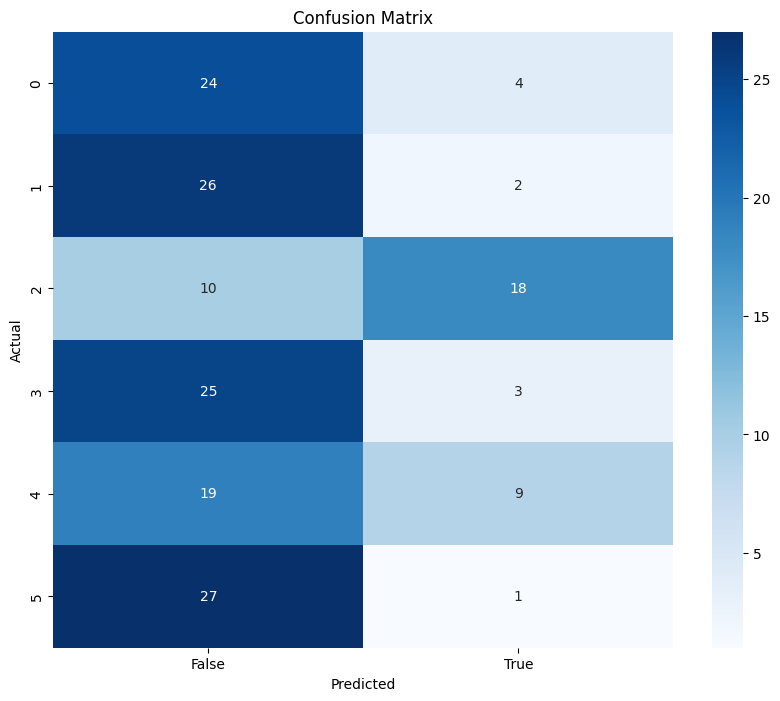

In [5]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g', ax=ax)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()



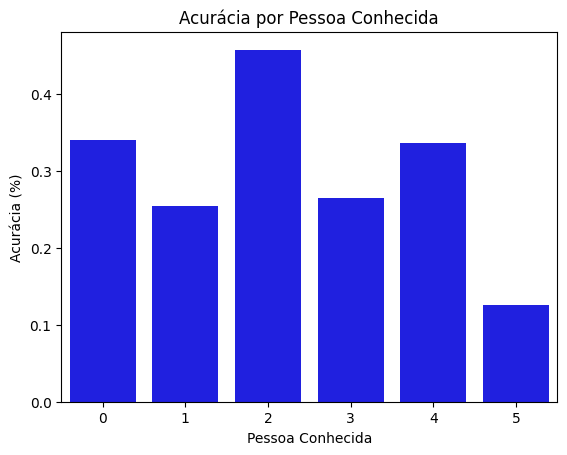

In [6]:
# Plot accuracy by known person
accuracy_by_person = df.groupby('Known Person')['Accuracy'].mean()
sns.barplot(x=accuracy_by_person.index, y=accuracy_by_person.values, color='blue')
plt.title('Acurácia por Pessoa Conhecida')
plt.xlabel('Pessoa Conhecida')
plt.ylabel('Acurácia (%)')
plt.show()



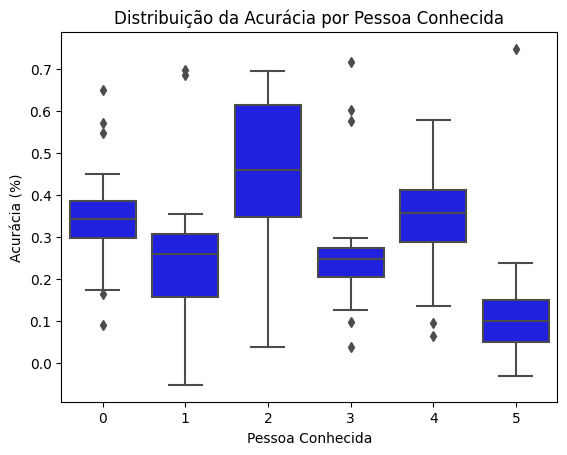

In [7]:
# Plot distribution of accuracy by known person
sns.boxplot(x='Known Person', y='Accuracy', data=df, color='blue')
plt.title('Distribuição da Acurácia por Pessoa Conhecida')
plt.xlabel('Pessoa Conhecida')
plt.ylabel('Acurácia (%)')
plt.show()



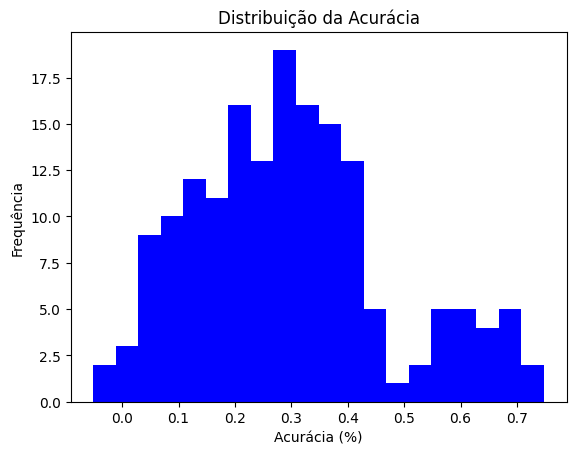

In [8]:
# Plot histogram
plt.hist(df['Accuracy'], bins=20, color='blue')
plt.title('Distribuição da Acurácia')
plt.xlabel('Acurácia (%)')
plt.ylabel('Frequência')
plt.show()



In [9]:
fim = datetime.datetime.now()
print('Tempo de execução:', fim - inicio)


Tempo de execução: 0:03:46.639519


In [10]:

df.to_csv('results.csv', index=False)